In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests

In [112]:
# Import a CSV file into a Pandas DataFrame (10)
# the CSV is an extraction (originally from a relational database) of IFRS9 Expected Credit Losses by quarter end
# quarters from Q3-19 to Q2-21
ECL = pd.read_csv("export1.csv", parse_dates=["REPORTING_DATE"], index_col="REPORTING_DATE")
ECL.head()

,STICHTAG_MANDANT_LAUF_RECHT_AN,CLIENT,KEY_RUN,KEY_REPORTING_REGULATION,TRANSACTION_ID,KEY_TRANSACTION_CAT,GROUP_CONS_COMPANIES_ID,KEY_SECURITISATION_VIEW,KEY_PRIMARY_RISK_PARTNER,AGE,...,LGD_PR_UNCOL_IFRS_Y2,LGD_PR_UNCOL_IFRS_Y3,ASSET_CLASS_TRANSACTION_IRB,IME_TRANS_CLUSTER_ID,THRESHOLD_PD_ADJUSTED,FLAG_PRIVATI_LIKE,SCONF_NO_FIDO,SEGMENTO_INTERNO,CALIB_DRIVER,CLB_DRIVER_PRE_WS
REPORTING_DATE,,,,,,,,,,,,,,,,,,,,,
2019-09-30,19093002200AIFRSRCI,2200,57,IFRS,24036126_REPO,R,,B,P,98,...,0.0,0.0,BS,24036126_REPO_R,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30,19093002200AIFRSRCI,2200,57,IFRS,24037558_REPO,R,,B,P,144,...,0.0,0.0,BA,24037558_REPO_R,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30,19093002200AIFRSRCI,2200,57,IFRS,24038130_REPO,R,,B,P,91,...,0.0,0.0,BS,24038130_REPO_R,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30,19093002200AIFRSRCI,2200,57,IFRS,24081965_REPO,R,,B,P,110,...,0.0,0.0,BS,24081965_REPO_R,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30,19093002200AIFRSRCI,2200,57,IFRS,30374682_REPO,R,,B,P,395,...,0.0,0.0,BA,30374682_REPO_R,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
# Define a custom function to create reusable code (10)  Step 1
# Replace missing values or drop duplicates (10)
def df_clean(table_name):
    table_name.drop_duplicates(inplace=True)
    table_name.dropna(axis=1, how='any', inplace=True)
    table_name.rename(columns=str.lower, inplace=True)

In [115]:
# Define a custom function to create reusable code (10)  step 2
df_clean(ECL)

In [127]:
# Your project should include sorting, indexing, and grouping (10)
ECL[sorted(ECL)]

,age,client,dat_perf_forborne_start,date_end_trans_adj,date_inception_transaction,date_rating_at_inception,days_delay_pr,ead1y,eadlt,effective_interest_rate,...,pd_pr_ifrs_y1,pd_pr_ifrs_y2,pd_pr_ifrs_y3,pdlt,product_identification_id,residual_maturity,securitisation_rate,securitisation_transaction_id,stichtag_mandant_lauf_recht_an,transaction_id
REPORTING_DATE,,,,,,,,,,,,,,,,,,,,,
2019-09-30,98,2200,01-JAN-00,20-FEB-20,24-JUN-19,06-APR-19,0,3.359181e+05,8.397952e+05,0.00000,...,0.001221,0.0,0.0,0.000488,12-24-02-01,143,0,,19093002200AIFRSRCI,24036126_REPO
2019-09-30,144,2200,01-JAN-00,27-FEB-20,09-MAY-19,15-JUN-18,0,1.211426e+07,2.888167e+07,0.00000,...,0.001601,0.0,0.0,0.000672,12-24-02-01,150,0,,19093002200AIFRSRCI,24037558_REPO
2019-09-30,91,2200,01-JAN-00,01-OCT-19,01-JUL-19,11-SEP-18,0,1.476728e+05,5.316222e+07,0.00000,...,0.002555,0.0,0.0,0.000007,12-21-01-01,1,0,,19093002200AIFRSRCI,24038130_REPO
2019-09-30,110,2200,01-JAN-00,26-JAN-20,12-JUN-19,15-DEC-18,0,8.414928e+05,2.545692e+06,0.00000,...,0.001240,0.0,0.0,0.000410,12-21-01-01,118,0,,19093002200AIFRSRCI,24081965_REPO
2019-09-30,395,2200,01-JAN-00,29-JUN-20,31-AUG-18,31-JUL-18,0,1.032456e+08,1.356512e+08,0.00000,...,0.002076,0.0,0.0,0.001580,12-24-02-01,273,0,,19093002200AIFRSRCI,30374682_REPO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,2599,2200,01-JAN-00,24-MAY-22,19-MAY-14,27-MAY-21,0,4.693901e+07,5.103438e+07,0.02081,...,0.000006,0.0,0.0,0.000005,12-01-01-01,328,0,,21063002200AIFRSRCI,IS_SECTRANS_XS0750894577_FVTOCI_21
2021-06-30,0,2200,01-JAN-00,30-JUN-22,30-JUN-21,29-JUN-21,0,3.116480e+06,3.073788e+06,0.00000,...,0.000250,0.0,0.0,0.000250,01-01-01-13,365,0,,21063002200AIFRSRCI,NO_CURRENT__100000010_1000001_11_USD
2021-06-30,0,2200,01-JAN-00,30-JUN-22,30-JUN-21,29-JUN-21,0,7.410084e+04,7.308576e+04,0.00000,...,0.000928,0.0,0.0,0.000928,01-01-01-13,365,0,,21063002200AIFRSRCI,NO_CURRENT__100000010_1000002_11_GBP


In [135]:
# exploring by Returning Multiple Columns (DataFrame)
ECL[['key_rating_method', 'key_rating_procedure_id']]

,key_rating_method,key_rating_procedure_id
REPORTING_DATE,,
2019-09-30,IGB,BANKS
2019-09-30,IGB,BANKS
2019-09-30,IGB,BANKS
2019-09-30,IGB,BANKS
2019-09-30,IGB,BANKS
...,...,...
2021-06-30,IGS,PAESI
2021-06-30,IGB,BANKS
2021-06-30,IGB,BANKS


In [138]:
# exploring...
ECL['key_rating_procedure_id'].unique()

array(['BANKS', 'INS', 'PAESI'], dtype=object)

In [155]:
# Slicing, loc or iloc (10) Step 1
ECL[0:10][['key_rating_method', 'key_rating_procedure_id']]

,key_rating_method,key_rating_procedure_id
REPORTING_DATE,,
2019-09-30,IGB,BANKS
2019-09-30,IGB,BANKS
2019-09-30,IGB,BANKS
2019-09-30,IGB,BANKS
2019-09-30,IGB,BANKS
2019-09-30,IGB,BANKS
2019-09-30,IGB,BANKS
2019-09-30,CLU,BANKS
2019-09-30,RGV,INS


In [156]:
# Slicing, loc or iloc (10) Step 2
# Iloc
ECL.iloc[0:10, 0:5]

,stichtag_mandant_lauf_recht_an,client,key_run,key_reporting_regulation,transaction_id
REPORTING_DATE,,,,,
2019-09-30,19093002200AIFRSRCI,2200,57,IFRS,24036126_REPO
2019-09-30,19093002200AIFRSRCI,2200,57,IFRS,24037558_REPO
2019-09-30,19093002200AIFRSRCI,2200,57,IFRS,24038130_REPO
2019-09-30,19093002200AIFRSRCI,2200,57,IFRS,24081965_REPO
2019-09-30,19093002200AIFRSRCI,2200,57,IFRS,30374682_REPO
2019-09-30,19093002200AIFRSRCI,2200,57,IFRS,CN_DEPOSITS_37368534
2019-09-30,19093002200AIFRSRCI,2200,57,IFRS,CN_DEPOSITS_37408863
2019-09-30,19093002200AIFRSRCI,2200,57,IFRS,CN_LOANS____11098902
2019-09-30,19093002200AIFRSRCI,2200,57,IFRS,CN_LOANS____11098912


In [157]:
# Sorting
ECL.sort_index(ascending=False)

,stichtag_mandant_lauf_recht_an,client,key_run,key_reporting_regulation,transaction_id,key_transaction_cat,group_cons_companies_id,key_securitisation_view,key_primary_risk_partner,age,...,key_id_sap,product_identification_id,key_product,pd_pr_ifrs_y1,lgd_pr_uncol_ifrs_y1,pd_pr_ifrs_y2,pd_pr_ifrs_y3,lgd_pr_uncol_ifrs_y2,lgd_pr_uncol_ifrs_y3,ime_trans_cluster_id
REPORTING_DATE,,,,,,,,,,,,,,,,,,,,,
2021-06-30,21063002200AIFRSRCI,2200,57,IFRS,NO_CURRENT__100000050_1000289_51_EUR,N,,B,P,0,...,,01-01-01-13,01-01-01-13,0.001019,0.188677,0.000000,0.000000,0.000000,0.00000,NO_CURRENT__100000050_1000289_51_EUR_N
2021-06-30,21063002200AIFRSRCI,2200,57,IFRS,IS_SECTRANS_XS0821096418_FVTOCI_1,N,,B,P,2798,...,,12-01-01-01,12-01-01-01,0.000027,0.304515,0.000024,0.000000,0.303407,0.00000,IS_SECTRANS_XS0821096418_FVTOCI_1_N
2021-06-30,21063002200AIFRSRCI,2200,57,IFRS,24036126_REPO,R,,B,P,134,...,,12-24-02-01,12-XX-XX-XX,0.000471,0.382674,0.000000,0.000000,0.000000,0.00000,24036126_REPO_R
2021-06-30,21063002200AIFRSRCI,2200,57,IFRS,NO_CURRENT__100000011_1000000_11_CHF,N,,B,P,0,...,,01-01-01-13,01-01-01-13,0.001787,0.389904,0.000000,0.000000,0.000000,0.00000,NO_CURRENT__100000011_1000000_11_CHF_N
2021-06-30,21063002200AIFRSRCI,2200,57,IFRS,NO_CURRENT__100000010_1000289_51_EUR,N,,B,P,0,...,,01-01-01-13,01-01-01-13,0.001019,0.188677,0.000000,0.000000,0.000000,0.00000,NO_CURRENT__100000010_1000289_51_EUR_N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30,19093002200AIFRSRCI,2200,57,IFRS,IS_SECTRANS_IT0004759673_FVTOCI_2,N,,B,P,1224,...,,12-01-01-01,12-01-01-01,0.001212,0.222879,0.001202,0.001134,0.219264,0.21601,IS_SECTRANS_IT0004759673_FVTOCI_2_N
2019-09-30,19093002200AIFRSRCI,2200,57,IFRS,IS_SECTRANS_IT0004759673_FVTOCI_1,N,,B,P,1225,...,,12-01-01-01,12-01-01-01,0.001212,0.222879,0.001202,0.001134,0.219264,0.21601,IS_SECTRANS_IT0004759673_FVTOCI_1_N
2019-09-30,19093002200AIFRSRCI,2200,57,IFRS,IS_SECTRANS_IT0004695075_FVTOCI_8,N,,B,P,1257,...,,12-01-01-01,12-01-01-01,0.001212,0.222418,0.001202,0.000000,0.218800,0.00000,IS_SECTRANS_IT0004695075_FVTOCI_8_N


In [186]:
# creating a subset
ECL2 = ECL[['partner_id', 'transaction_id', 'ead1y', 'expected_loss_1y', 'pd1y', 'key_low_credit_risk_exemption', 'key_rating_procedure_id','original_rating', 'orig_rating_at_inception']].copy(deep=True)
ECL2.head()

,partner_id,transaction_id,ead1y,expected_loss_1y,pd1y,key_low_credit_risk_exemption,key_rating_procedure_id,original_rating,orig_rating_at_inception
REPORTING_DATE,,,,,,,,,
2019-09-30,24036126,24036126_REPO,3.359181e+05,156.94,0.001221,N,BANKS,B5,B5
2019-09-30,24037558,24037558_REPO,1.211426e+07,6042.41,0.001601,N,BANKS,B6,B6
2019-09-30,24038130,24038130_REPO,1.476728e+05,171.94,0.002555,N,BANKS,B8,B8
2019-09-30,24081965,24081965_REPO,8.414928e+05,419.59,0.001240,N,BANKS,B5,B5
2019-09-30,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,BANKS,B7,B7


In [188]:
# creating a new index with primary key Step 1
ECL2.reset_index(inplace=True)
ECL2.head()

,index,REPORTING_DATE,partner_id,transaction_id,ead1y,expected_loss_1y,pd1y,key_low_credit_risk_exemption,key_rating_procedure_id,original_rating,orig_rating_at_inception
0,0,2019-09-30,24036126,24036126_REPO,3.359181e+05,156.94,0.001221,N,BANKS,B5,B5
1,1,2019-09-30,24037558,24037558_REPO,1.211426e+07,6042.41,0.001601,N,BANKS,B6,B6
2,2,2019-09-30,24038130,24038130_REPO,1.476728e+05,171.94,0.002555,N,BANKS,B8,B8
3,3,2019-09-30,24081965,24081965_REPO,8.414928e+05,419.59,0.001240,N,BANKS,B5,B5
4,4,2019-09-30,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,BANKS,B7,B7


In [189]:
# creating a new index with primary key Step 2
ECL2["REPORTING_DATE"] = ECL2["REPORTING_DATE"].astype(str)

In [190]:
# creating a new index with primary key Step 3
ECL2["primary_key"]=ECL2["REPORTING_DATE"]+ECL2["transaction_id"]
ECL2.head()

,index,REPORTING_DATE,partner_id,transaction_id,ead1y,expected_loss_1y,pd1y,key_low_credit_risk_exemption,key_rating_procedure_id,original_rating,orig_rating_at_inception,primary_key
0,0,2019-09-30,24036126,24036126_REPO,3.359181e+05,156.94,0.001221,N,BANKS,B5,B5,2019-09-3024036126_REPO
1,1,2019-09-30,24037558,24037558_REPO,1.211426e+07,6042.41,0.001601,N,BANKS,B6,B6,2019-09-3024037558_REPO
2,2,2019-09-30,24038130,24038130_REPO,1.476728e+05,171.94,0.002555,N,BANKS,B8,B8,2019-09-3024038130_REPO
3,3,2019-09-30,24081965,24081965_REPO,8.414928e+05,419.59,0.001240,N,BANKS,B5,B5,2019-09-3024081965_REPO
4,4,2019-09-30,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,BANKS,B7,B7,2019-09-3030374682_REPO


In [192]:
# creating a new index with primary key Step 4
ECL2.set_index("primary_key")

,index,REPORTING_DATE,partner_id,transaction_id,ead1y,expected_loss_1y,pd1y,key_low_credit_risk_exemption,key_rating_procedure_id,original_rating,orig_rating_at_inception
primary_key,,,,,,,,,,,
2019-09-3024036126_REPO,0,2019-09-30,24036126,24036126_REPO,3.359181e+05,156.94,0.001221,N,BANKS,B5,B5
2019-09-3024037558_REPO,1,2019-09-30,24037558,24037558_REPO,1.211426e+07,6042.41,0.001601,N,BANKS,B6,B6
2019-09-3024038130_REPO,2,2019-09-30,24038130,24038130_REPO,1.476728e+05,171.94,0.002555,N,BANKS,B8,B8
2019-09-3024081965_REPO,3,2019-09-30,24081965,24081965_REPO,8.414928e+05,419.59,0.001240,N,BANKS,B5,B5
2019-09-3030374682_REPO,4,2019-09-30,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,BANKS,B7,B7
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30IS_SECTRANS_XS0750894577_FVTOCI_21,1588,2021-06-30,24158450,IS_SECTRANS_XS0750894577_FVTOCI_21,4.693901e+07,91.67,0.000006,J,PAESI,S3,S3
2021-06-30NO_CURRENT__100000010_1000001_11_USD,1589,2021-06-30,24036841,NO_CURRENT__100000010_1000001_11_USD,3.116480e+06,518.04,0.000250,N,BANKS,B4,B4
2021-06-30NO_CURRENT__100000010_1000002_11_GBP,1590,2021-06-30,24036038,NO_CURRENT__100000010_1000002_11_GBP,7.410084e+04,16.07,0.000928,N,BANKS,B6,B6


In [194]:
# New subset
ECL3 = ECL[['partner_id', 'transaction_id', 'ead1y', 'expected_loss_1y', 'pd1y', 'key_low_credit_risk_exemption', 'key_rating_procedure_id','original_rating', 'orig_rating_at_inception']].copy(deep=True)
ECL3.head()

,partner_id,transaction_id,ead1y,expected_loss_1y,pd1y,key_low_credit_risk_exemption,key_rating_procedure_id,original_rating,orig_rating_at_inception
REPORTING_DATE,,,,,,,,,
2019-09-30,24036126,24036126_REPO,3.359181e+05,156.94,0.001221,N,BANKS,B5,B5
2019-09-30,24037558,24037558_REPO,1.211426e+07,6042.41,0.001601,N,BANKS,B6,B6
2019-09-30,24038130,24038130_REPO,1.476728e+05,171.94,0.002555,N,BANKS,B8,B8
2019-09-30,24081965,24081965_REPO,8.414928e+05,419.59,0.001240,N,BANKS,B5,B5
2019-09-30,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,BANKS,B7,B7


In [195]:
# Looping, iterrows (10) - using apply() Step1
def loss_size(column):
    if column > 1000000:
        return "large"
    else:
        return "expected"

In [197]:
# Looping, iterrows (10) - using apply() Step2
ECL3["loss_size"] = ECL3["expected_loss_1y"].apply(loss_size)
ECL3.head()

,partner_id,transaction_id,ead1y,expected_loss_1y,pd1y,key_low_credit_risk_exemption,key_rating_procedure_id,original_rating,orig_rating_at_inception,loss_size
REPORTING_DATE,,,,,,,,,,
2019-09-30,24036126,24036126_REPO,3.359181e+05,156.94,0.001221,N,BANKS,B5,B5,expected
2019-09-30,24037558,24037558_REPO,1.211426e+07,6042.41,0.001601,N,BANKS,B6,B6,expected
2019-09-30,24038130,24038130_REPO,1.476728e+05,171.94,0.002555,N,BANKS,B8,B8,expected
2019-09-30,24081965,24081965_REPO,8.414928e+05,419.59,0.001240,N,BANKS,B5,B5,expected
2019-09-30,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,BANKS,B7,B7,expected


In [199]:
# Filtering
ECL3[ECL3["loss_size"]=="large"]

,partner_id,transaction_id,ead1y,expected_loss_1y,pd1y,key_low_credit_risk_exemption,key_rating_procedure_id,original_rating,orig_rating_at_inception,loss_size
REPORTING_DATE,,,,,,,,,,
2020-03-31,9132323,IS_SECTRANS_IT0000366655_AC_1,3.994692e+08,1102616.11,0.004444,J,PAESI,S8,S8,large
2020-06-30,9132323,IS_SECTRANS_IT0000366655_AC_1,3.907436e+08,1011863.62,0.004169,J,PAESI,S8,S8,large
2020-09-30,9132323,IS_SECTRANS_IT0000366655_AC_1,3.994061e+08,1466627.02,0.005905,J,PAESI,S8,S8,large
2020-09-30,30374682,IS_SECTRANS_IT0003781652_AC_1,5.000000e+08,1089655.48,0.004869,J,BANKS,B7,B7,large
2020-09-30,30374682,IS_SECTRANS_IT0003782718_AC_1,5.008305e+08,1092224.26,0.004869,J,BANKS,B7,B7,large


In [202]:
ECL3["partner_id"] = ECL["partner_id"].astype(str)

In [203]:
ECL3[ (ECL3["partner_id"] == "30374682") &
          (ECL3["loss_size"] == "large")]

,partner_id,transaction_id,ead1y,expected_loss_1y,pd1y,key_low_credit_risk_exemption,key_rating_procedure_id,original_rating,orig_rating_at_inception,loss_size
REPORTING_DATE,,,,,,,,,,
2020-09-30,30374682,IS_SECTRANS_IT0003781652_AC_1,500000000.0,1089655.48,0.004869,J,BANKS,B7,B7,large
2020-09-30,30374682,IS_SECTRANS_IT0003782718_AC_1,500830511.1,1092224.26,0.004869,J,BANKS,B7,B7,large


In [225]:
# importing a new table
partner = pd.read_csv("export2Partner.csv")

In [226]:
# applying the data cleaning custom function
df_clean(partner)

In [228]:
# applying the column partner as index (Step 1 transform in string)
partner["partner_id"] = partner["partner_id"].astype(str)

In [229]:
# Step 2
partner_index = partner.set_index("partner_id")

In [230]:
partner_index.head()

,stichtag,mandant,stichtag_mandant_lauf,sl_abweich_laenderrisikoland,sl_politisches_sitzland,sl_rechtliches_land,partnerart,kz_mandanteninterner_partner,sl_rechtsform,sl_organbeziehung,...,kz_sme_threshold_not_exc_irb,kz_sme_threshold_not_exc_sta,sl_cva_counterparty_class,kz_eligible_setting_matur_1_y,dat_legal_proc_init,sl_enterprise_size,sl_status_legal_proc,sl_intragroup_exposure_crr_113,sl_legal_form_ecb,sl_type_of_entity
partner_id,,,,,,,,,,,,,,,,,,,,,
24045513,30-JUN-21,2200,21063002200A,XXX,IE,7,XX,N,XXX,XX,...,N,N,XXX,N,01-JAN-00,L,N,X,XXXXXX,XX
24038001,30-JUN-21,2200,21063002200A,XXX,BE,17,XX,N,XXX,XX,...,N,N,XXX,N,01-JAN-00,L,N,X,XXXXXX,XX
24053273,30-JUN-21,2200,21063002200A,XXX,XIO,912,XX,N,XXX,XX,...,N,N,XXX,N,01-JAN-00,L,N,X,XXXXXX,XX
87010403,30-JUN-21,2200,21063002200A,XXX,DE,39,XX,N,XXX,XX,...,N,N,XXX,N,01-JAN-00,L,N,X,XXXXXX,XX
23670755,30-JUN-21,2200,21063002200A,XXX,NL,3,XX,N,XXX,XX,...,N,N,XXX,N,01-JAN-00,L,N,X,XXXXXX,XX


In [235]:
partner_index[sorted(partner_index)]

,dat_ausfallklassifikation_boi,dat_beg_partnerbeziehung,dat_clearing_threshold_exc,dat_erste_ausfallklassif_boi,dat_geburt,dat_legal_proc_init,jahreseinkommen,kz_15_tage_wahlrecht,kz_anonymisierung,kz_beauf_investmentf_pensionsk,...,sl_spv_business_area,sl_spv_category,sl_staatsangehoerigkeit,sl_status_legal_proc,sl_teilportfolio_irb,sl_teilportfolio_sta,sl_type_of_entity,sl_unternehmensart_aufsichtsr,stichtag,stichtag_mandant_lauf
partner_id,,,,,,,,,,,,,,,,,,,,,
24045513,30-JUN-21,01-JAN-00,31-DEC-99,01-JAN-00,01-JAN-00,01-JAN-00,0,N,N,N,...,0,X,XX,N,BA,BA,XX,XX,30-JUN-21,21063002200A
24038001,30-JUN-21,01-JAN-00,31-DEC-99,01-JAN-00,01-JAN-00,01-JAN-00,0,N,N,N,...,0,X,XX,N,BA,BA,XX,XX,30-JUN-21,21063002200A
24053273,30-JUN-21,01-JAN-00,31-DEC-99,01-JAN-00,01-JAN-00,01-JAN-00,0,N,N,N,...,0,X,XX,N,BM,BM,XX,XX,30-JUN-21,21063002200A
87010403,30-JUN-21,01-JAN-00,31-DEC-99,01-JAN-00,01-JAN-00,01-JAN-00,0,N,N,N,...,0,X,XX,N,BA,BA,XX,XX,30-JUN-21,21063002200A
23670755,30-JUN-21,01-JAN-00,31-DEC-99,01-JAN-00,01-JAN-00,01-JAN-00,0,N,N,N,...,0,X,XX,N,CL,CR,XX,XX,30-JUN-21,21063002200A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24059277,30-JUN-21,01-JAN-00,31-DEC-99,01-JAN-00,01-JAN-00,01-JAN-00,0,N,N,N,...,0,X,XX,N,BS,BS,XX,XX,30-JUN-21,21063002200A
1754026,30-JUN-21,01-JAN-00,31-DEC-99,01-JAN-00,01-JAN-00,01-JAN-00,0,N,N,N,...,0,X,XX,N,SR,SR,XX,XX,30-JUN-21,21063002200A
24141591,30-JUN-21,01-JAN-00,31-DEC-99,01-JAN-00,01-JAN-00,01-JAN-00,0,N,N,N,...,0,X,XX,N,BA,BA,XX,XX,30-JUN-21,21063002200A


In [238]:
partner_index.columns

Index(['stichtag', 'mandant', 'stichtag_mandant_lauf',
       'sl_abweich_laenderrisikoland', 'sl_politisches_sitzland',
       'sl_rechtliches_land', 'partnerart', 'kz_mandanteninterner_partner',
       'sl_rechtsform', 'sl_organbeziehung', 'sl_sonderpartner_gs1',
       'sl_teilportfolio_sta', 'sl_teilportfolio_irb', 'dat_geburt',
       'sl_leistungsstatus', 'kz_15_tage_wahlrecht', 'kz_anonymisierung',
       'kz_privilegierte_institution', 'kz_handwerker', 'kz_spv',
       'kz_beauf_investmentf_pensionsk', 'partnername', 'partnernachname',
       'sitz_ort', 'sitz_postleitzahl', 'sitz_strasse', 'sl_hinweis',
       'reportinginformation', 'jahreseinkommen', 'sl_partnerklasse_intern',
       'kz_leistungsstatus_automatisch', 'sl_unternehmensart_aufsichtsr',
       'kz_langfristige_kundenbez', 'kz_hedgefonds',
       'kz_unmittelbare_ausfallerkenn', 'sl_gewerbe',
       'kz_schuldnerueberwachung', 'liefersystem_id',
       'kz_interbankenmarktspezialist', 'dat_beg_partnerbeziehung',


In [240]:
# After having identified the columns containing the country codes per counterparty, I create a subset
# of the table partner called "partner_country".
partner_country = partner_index[["sl_politisches_sitzland", "sl_legal_country_iso_3166_1_a2"]].copy(deep=True)

In [241]:
# exploring...
partner_country.head()

,sl_politisches_sitzland,sl_legal_country_iso_3166_1_a2
partner_id,,
24045513,IE,IE
24038001,BE,BE
24053273,XIO,LU
87010403,DE,CH
23670755,NL,NL


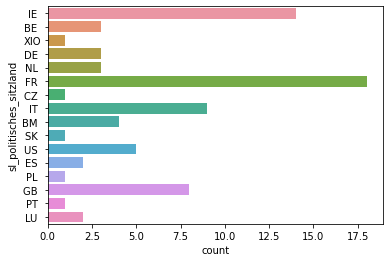

In [242]:
# exploring by plotting...
sns.countplot(data=partner_country, y="sl_politisches_sitzland");

In [243]:
# rename columns
partner_country.rename(columns={"sl_politisches_sitzland": "country_of_risk", "sl_legal_country_iso_3166_1_a2" : "legal_country"}, inplace=True)
partner_country.head()

,country_of_risk,legal_country
partner_id,,
24045513,IE,IE
24038001,BE,BE
24053273,XIO,LU
87010403,DE,CH
23670755,NL,NL


In [247]:
# Merge DataFrames (10)
ECL4 = ECL3.merge(partner_country, how="left", left_on="partner_id", right_index=True)

In [248]:
ECL4.head()

,partner_id,transaction_id,ead1y,expected_loss_1y,pd1y,key_low_credit_risk_exemption,key_rating_procedure_id,original_rating,orig_rating_at_inception,loss_size,country_of_risk,legal_country
REPORTING_DATE,,,,,,,,,,,,
2019-09-30,24036126,24036126_REPO,3.359181e+05,156.94,0.001221,N,BANKS,B5,B5,expected,FR,FR
2019-09-30,24037558,24037558_REPO,1.211426e+07,6042.41,0.001601,N,BANKS,B6,B6,expected,DE,DE
2019-09-30,24038130,24038130_REPO,1.476728e+05,171.94,0.002555,N,BANKS,B8,B8,expected,IT,IT
2019-09-30,24081965,24081965_REPO,8.414928e+05,419.59,0.001240,N,BANKS,B5,B5,expected,FR,FR
2019-09-30,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,BANKS,B7,B7,expected,IT,IT


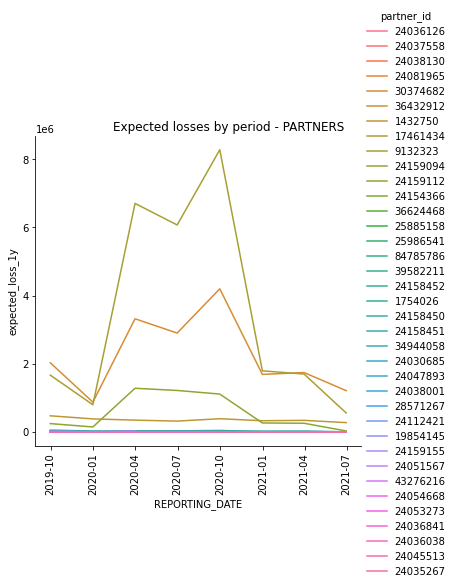

In [276]:
# Visualising: Seaborn, MatPlotlib (20)
# Exploring largest losses by partners
g = sns.relplot(data=ECL4, x=ECL4.index, y="expected_loss_1y",
                kind="line", hue="partner_id", ci=None, estimator=sum);
g.fig.suptitle("Expected losses by period - PARTNERS")
plt.xticks(rotation=90);

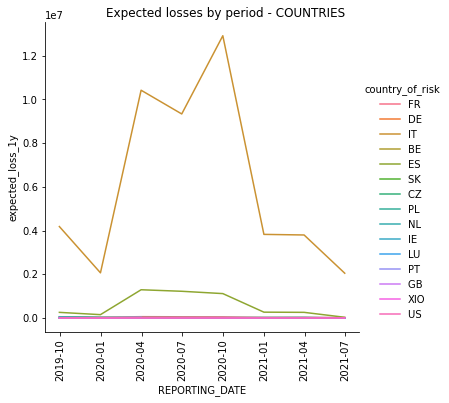

In [277]:
# Visualising: Seaborn, MatPlotlib (20)
# Exploring largest losses by countries
g = sns.relplot(data=ECL4, x=ECL4.index, y="expected_loss_1y",
                kind="line", hue="country_of_risk", ci=None, estimator=sum);
g.fig.suptitle("Expected losses by period - COUNTRIES")
plt.xticks(rotation=90);

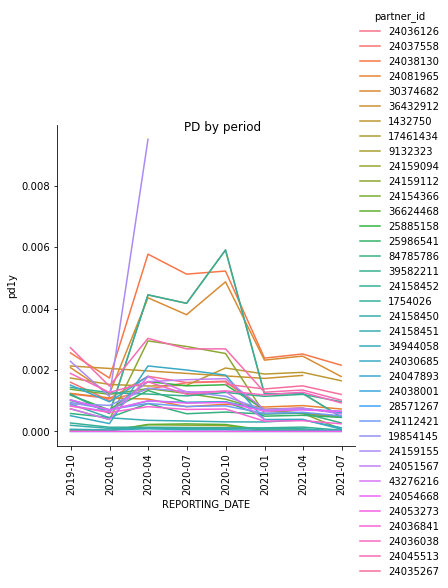

In [273]:
# Visualising: Seaborn, MatPlotlib (20)
# Exploring largest PDs by partners
g = sns.relplot(data=ECL4, x=ECL4.index, y="pd1y",
                kind="line", hue="partner_id", ci=None);
g.fig.suptitle("PD by period")
plt.xticks(rotation=90);

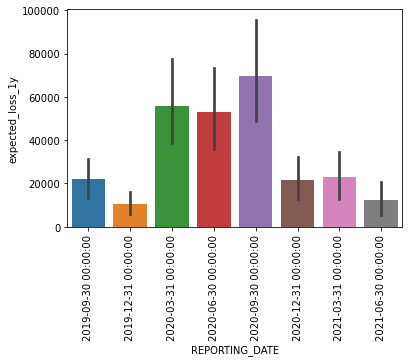

In [274]:
# Visualising: Seaborn, MatPlotlib (20)
# losses per period
g = sns.barplot(data=ECL4, x=ECL4.index, y="expected_loss_1y")
plt.xticks(rotation=90);

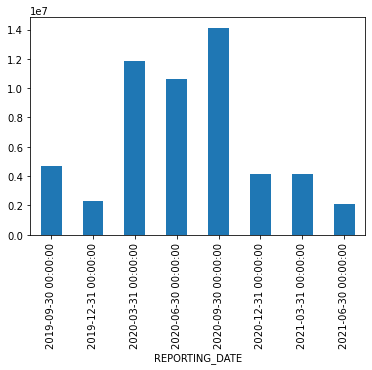

In [278]:
# Grouping
# total losses per period
ECL4.groupby(ECL4.index).sum()['expected_loss_1y'].plot.bar();

In [279]:
# Exploring correlations. First insights: would have expected higher correlation between PD and ECL.
ECL4.corr()

,ead1y,expected_loss_1y,pd1y
ead1y,1.000000,0.808955,0.250511
expected_loss_1y,0.808955,1.000000,0.424864
pd1y,0.250511,0.424864,1.000000


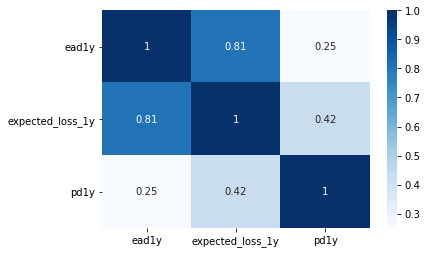

In [280]:
# Exploring correlations: heatmap (modelling)
sns.heatmap(ECL4.corr(), annot=True, cmap='Blues');

Text(2020-01-01 00:00:00, 800000, 'Covid Impact')

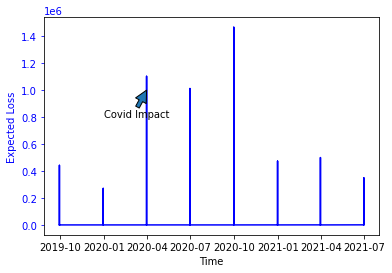

In [292]:
# plotting using matplotlib. Could not find a better chart type in ax. !
fig, ax = plt.subplots()
ax.plot(ECL4.index, ECL4["expected_loss_1y"], color="blue")
ax.set_xlabel("Time")
ax.set_ylabel("Expected Loss", color="blue")
ax.tick_params("y", colors="blue")
ax.annotate("Covid Impact", xy=(pd.Timestamp("2020-03-31"), 1000000), xytext=(pd.Timestamp("2020-01"),800000),
            arrowprops={})

In [259]:
ECL5 = ECL4.reset_index()

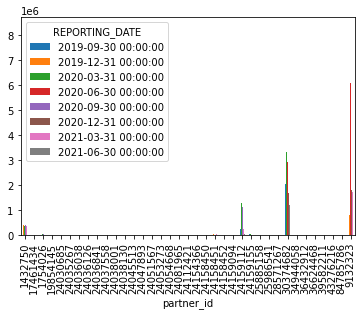

In [303]:
# Grouping and plotting (no worries I am going to do this from a smaller set!)
ECL5.pivot_table(values = "expected_loss_1y", index = "partner_id", columns="REPORTING_DATE", fill_value=0,
                 aggfunc=np.sum).plot(kind="bar")
plt.xticks(rotation=90);

In [304]:
# Subsetting again(selecting the biggest partners)
ECL6 = ECL5[ECL5["partner_id"].isin(["30374682", "1432750", "9132323", "24159112"])]

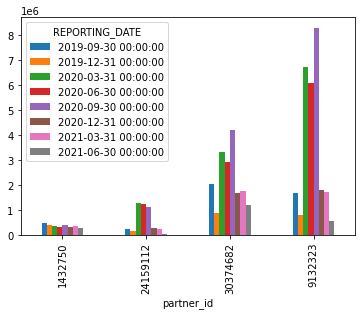

In [307]:
# Pivotting and plotting
ECL6.pivot_table(values = "expected_loss_1y", index = "partner_id", columns="REPORTING_DATE", fill_value=0,
                 aggfunc=np.sum).plot(kind="bar")
plt.xticks(rotation=90);

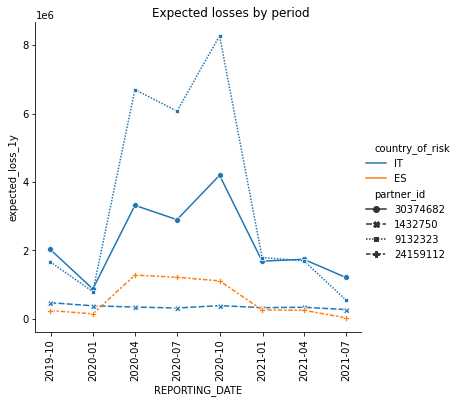

In [311]:
# Other types of plots step 1
g = sns.relplot(data=ECL6, x="REPORTING_DATE", y="expected_loss_1y",
                kind="line", hue="country_of_risk", style="partner_id", estimator="sum",
                ci=None, markers=True, dashes=True)
g.fig.suptitle("Expected losses by period")
g.set_xticklabels(rotation=90);

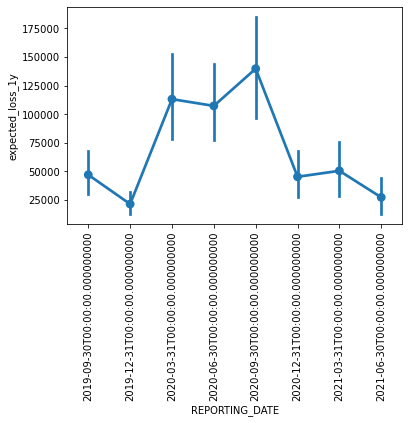

In [312]:
# Other types of plots step 2
g = sns.pointplot(data=ECL6, x="REPORTING_DATE", y="expected_loss_1y", figsize=(18,18))
plt.xticks(rotation=90);

In [313]:
# Real-world scenario. The project should use a real-world dataset and include a reference of their
# source in the report (10)Importing Real world data
GDP = pd.read_excel("Data_Extract_From_World_Development_Indicators.xlsx")

In [315]:
# Dictionary or Lists (10)
Country_Codes_ISO = {"Country Name":['Belgium', 'Czech Republic', 'Italy', 'Portugal', 'France', "Germany", 
                                     "Ireland", "Netherlands", "Slovak Republic", "Spain" ,
                                     "United Kingdom", "United States", "Luxembourg", "Poland"],
                    "Code_ISO": ["BE", "CZ", "IT", "PT", "FR", "DE", "IE", "NL", "SK", "ES",
                                 "UK", "US", "LU", "PL"]}

In [316]:
df = pd.DataFrame(Country_Codes_ISO)

In [317]:
GDP2 = GDP.merge(df, on="Country Name")

In [318]:
GDP2.head()

,Series Name,Series Code,Country Name,Country Code,2019 [YR2019],2020 [YR2020],Code_ISO
0,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Belgium,BEL,1.784694,-6.283930,BE
1,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Czech Republic,CZE,2.313605,-5.602304,CZ
2,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Italy,ITA,0.287450,-8.871146,IT
3,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Portugal,PRT,2.488959,-7.563616,PT
4,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,France,FRA,1.508594,-8.114907,FR


In [319]:
GDP2.rename(columns={"2019 [YR2019]": "2019", "2020 [YR2020]" : "2020"}, inplace=True)

In [401]:
# reshaping: using melt()
GDP3 = GDP2.melt(id_vars=["Country Name", "Code_ISO"], 
                                  value_vars=["2019", "2020"], var_name=["YEAR"], 
                                  value_name="GDP growth (annual %)")

In [396]:
GDP3

,Country Name,Code_ISO,YEAR,GDP growth (annual %)
0,Belgium,BE,2019,1.784694
1,Czech Republic,CZ,2019,2.313605
2,Italy,IT,2019,0.287450
3,Portugal,PT,2019,2.488959
4,France,FR,2019,1.508594
5,Germany,DE,2019,0.555451
6,Ireland,IE,2019,5.565201
7,Netherlands,NL,2019,1.677418
8,Slovak Republic,SK,2019,2.511588
9,Spain,ES,2019,1.950127


In [403]:
GDP3["YEAR"] = pd.to_datetime(GDP3["YEAR"])

In [405]:
GDP3["year"] = pd.DatetimeIndex(GDP3["YEAR"]).year

In [406]:
GDP3.dtypes

Country Name                     object
Code_ISO                         object
YEAR                     datetime64[ns]
GDP growth (annual %)           float64
year                              int64
dtype: object

In [407]:
ECL6["year"] = pd.DatetimeIndex(ECL6["REPORTING_DATE"]).year

<ipython-input-407-3ad2832ef780>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ECL6["year"] = pd.DatetimeIndex(ECL6["REPORTING_DATE"]).year


In [408]:
ECL6.dtypes

REPORTING_DATE                   datetime64[ns]
partner_id                               object
transaction_id                           object
ead1y                                   float64
expected_loss_1y                        float64
pd1y                                    float64
key_low_credit_risk_exemption            object
key_rating_procedure_id                  object
original_rating                          object
orig_rating_at_inception                 object
loss_size                                object
country_of_risk                          object
legal_country                            object
YEAR                             datetime64[ns]
year                                      int64
dtype: object

In [399]:
GDP3["year"] = pd.to_datetime(GDP3["year"])

In [411]:
GDP3

,Country Name,Code_ISO,YEAR,GDP growth (annual %),year
0,Belgium,BE,2019-01-01,1.784694,2019
1,Czech Republic,CZ,2019-01-01,2.313605,2019
2,Italy,IT,2019-01-01,0.287450,2019
3,Portugal,PT,2019-01-01,2.488959,2019
4,France,FR,2019-01-01,1.508594,2019
5,Germany,DE,2019-01-01,0.555451,2019
6,Ireland,IE,2019-01-01,5.565201,2019
7,Netherlands,NL,2019-01-01,1.677418,2019
8,Slovak Republic,SK,2019-01-01,2.511588,2019
9,Spain,ES,2019-01-01,1.950127,2019


In [382]:
GDP3.dtypes

Country Name                     object
Code_ISO                         object
YEAR                     datetime64[ns]
GDP growth (annual %)           float64
dtype: object

In [380]:
ECL6["YEAR"] = pd.to_datetime(ECL6["YEAR"])

<ipython-input-380-fdb2c07c23cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ECL6["YEAR"] = pd.to_datetime(ECL6["YEAR"])


In [413]:
ECL6

,REPORTING_DATE,partner_id,transaction_id,ead1y,expected_loss_1y,pd1y,key_low_credit_risk_exemption,key_rating_procedure_id,original_rating,orig_rating_at_inception,loss_size,country_of_risk,legal_country,YEAR,year
4,2019-09-30,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,BANKS,B7,B7,expected,IT,IT,1970-01-01 00:00:00.000002019,2019
6,2019-09-30,30374682,CN_DEPOSITS_37408863,4.794454e+06,4139.10,0.002076,N,BANKS,B7,B7,expected,IT,IT,1970-01-01 00:00:00.000002019,2019
7,2019-09-30,1432750,CN_LOANS____11098902,3.001338e+08,313905.60,0.001739,X,BANKS,B14,B14,expected,IT,IT,1970-01-01 00:00:00.000002019,2019
9,2019-09-30,1432750,CN_LOANS____11098915,1.504327e+08,159194.50,0.001739,X,BANKS,B14,B14,expected,IT,IT,1970-01-01 00:00:00.000002019,2019
10,2019-09-30,30374682,IS_SECTRANS_IT0003781652_AC_1,5.000000e+08,441434.77,0.002076,J,BANKS,B7,B7,expected,IT,IT,1970-01-01 00:00:00.000002019,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2021-06-30,9132323,IS_SECTRANS_IT0005327306_FVTOCI_5,5.301760e+07,8250.89,0.000470,J,PAESI,S8,S8,expected,IT,IT,1970-01-01 00:00:00.000002021,2021
1577,2021-06-30,24159112,IS_SECTRANS_ES00000126B2_FVTOCI_11,5.624941e+06,124.96,0.000074,J,PAESI,S7,S7,expected,ES,ES,1970-01-01 00:00:00.000002021,2021
1578,2021-06-30,24159112,IS_SECTRANS_ES00000126B2_FVTOCI_12,1.124988e+08,2499.25,0.000074,J,PAESI,S7,S7,expected,ES,ES,1970-01-01 00:00:00.000002021,2021
1579,2021-06-30,24159112,IS_SECTRANS_ES00000126B2_FVTOCI_13,8.437412e+07,1874.44,0.000074,J,PAESI,S7,S7,expected,ES,ES,1970-01-01 00:00:00.000002021,2021


In [409]:
ECL_GDP = pd.merge_ordered(ECL6, GDP3, left_on=["year", "country_of_risk"],
                           right_on=["year", "Code_ISO"], how="left")

In [410]:
ECL_GDP

,REPORTING_DATE,partner_id,transaction_id,ead1y,expected_loss_1y,pd1y,key_low_credit_risk_exemption,key_rating_procedure_id,original_rating,orig_rating_at_inception,loss_size,country_of_risk,legal_country,YEAR_x,year,Country Name,Code_ISO,YEAR_y,GDP growth (annual %)
0,2019-09-30,24159112,IS_SECTRANS_ES00000121G2_FVTOCI_1,6.279331e+07,10138.27,0.000737,J,PAESI,S7,S7,expected,ES,ES,1970-01-01 00:00:00.000002019,2019,NaN,NaN,NaT,NaN
1,2019-09-30,24159112,IS_SECTRANS_ES00000121G2_FVTOCI_2,3.139665e+07,5069.14,0.000737,J,PAESI,S7,S7,expected,ES,ES,1970-01-01 00:00:00.000002019,2019,NaN,NaN,NaT,NaN
2,2019-09-30,24159112,IS_SECTRANS_ES00000121G2_FVTOCI_3,3.139665e+07,5069.14,0.000737,J,PAESI,S7,S7,expected,ES,ES,1970-01-01 00:00:00.000002019,2019,NaN,NaN,NaT,NaN
3,2019-09-30,24159112,IS_SECTRANS_ES00000121G2_FVTOCI_4,3.139665e+07,5069.14,0.000737,J,PAESI,S7,S7,expected,ES,ES,1970-01-01 00:00:00.000002019,2019,NaN,NaN,NaT,NaN
4,2019-09-30,24159112,IS_SECTRANS_ES00000121G2_FVTOCI_5,6.279331e+07,10138.27,0.000737,J,PAESI,S7,S7,expected,ES,ES,1970-01-01 00:00:00.000002019,2019,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2021-06-30,9132323,IS_SECTRANS_IT0005277444_FVTOCI_4,5.090871e+07,8508.02,0.000470,J,PAESI,S8,S8,expected,IT,IT,1970-01-01 00:00:00.000002021,2021,NaN,NaN,NaT,NaN
740,2021-06-30,9132323,IS_SECTRANS_IT0005327306_FVTOCI_1,2.385792e+08,37129.01,0.000470,J,PAESI,S8,S8,expected,IT,IT,1970-01-01 00:00:00.000002021,2021,NaN,NaN,NaT,NaN
741,2021-06-30,9132323,IS_SECTRANS_IT0005327306_FVTOCI_4,2.120704e+08,33003.57,0.000470,J,PAESI,S8,S8,expected,IT,IT,1970-01-01 00:00:00.000002021,2021,NaN,NaN,NaT,NaN
742,2021-06-30,9132323,IS_SECTRANS_IT0005327306_FVTOCI_5,5.301760e+07,8250.89,0.000470,J,PAESI,S8,S8,expected,IT,IT,1970-01-01 00:00:00.000002021,2021,NaN,NaN,NaT,NaN


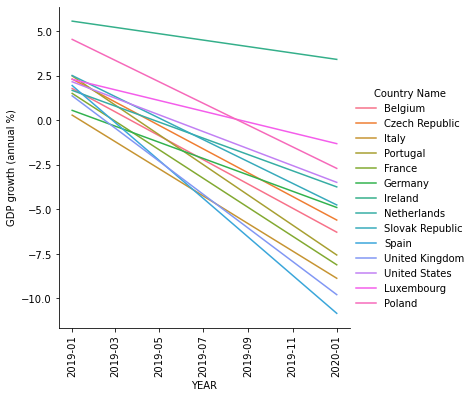

In [422]:
#Plotting the GDP deterioration in the portfolio: Spain and Italy towards the bottom 
g = sns.relplot(data=GDP3, x="YEAR", y="GDP growth (annual %)", hue='Country Name', style="Country Name", dashes=False, kind="line")
g.set_xticklabels(rotation=90);

In [423]:
# importing using APIs
C19_Cases = requests.get("https://covid-api.mmediagroup.fr/v1//history?country=Italy&status=confirmed")

In [424]:
C19_Cases.status_code

200

In [425]:
C19_Cases_dict = C19_Cases.json()

In [426]:
C19_Cases_dict_df = pd.DataFrame(C19_Cases_dict["All"])

In [427]:
C19_Cases_dict_df.rename(columns={"dates": "cases"}, inplace=True)

In [428]:
C19_Cases_dict_df.index = pd.to_datetime(C19_Cases_dict_df.index)

In [429]:
C19_Cases_dict_df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-08-16', '2021-08-17', '2021-08-18', '2021-08-19',
               '2021-08-20', '2021-08-21', '2021-08-22', '2021-08-23',
               '2021-08-24', '2021-08-25'],
              dtype='datetime64[ns]', length=582, freq=None)

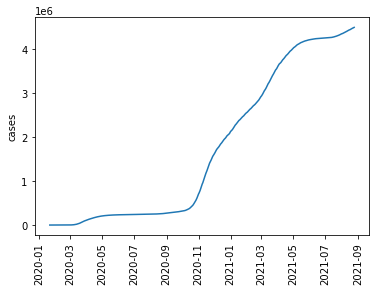

In [430]:
# Curve of COVID19 cases for Italy
fig, ax = plt.subplots()
ax.plot(C19_Cases_dict_df.index, C19_Cases_dict_df["cases"])
ax.set_ylabel("cases")
plt.xticks(rotation=90);

In [447]:
C19_B = requests.get('https://api.covid19api.com/summary')
C19_B = C19_B.json()
C19_B_countries = pd.DataFrame(C19_B['Countries'])

In [448]:
C19_B_countries

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,13f8df73-4913-49ac-9ee9-56bff573a07f,Afghanistan,AF,afghanistan,0,152722,0,7090,0,0,2021-08-26T14:37:24.185Z,{}
1,cc72f6e7-5d71-4798-9ff0-68d4cdd8553d,Albania,AL,albania,0,141365,0,2483,0,0,2021-08-26T14:37:24.185Z,{}
2,5daba5f8-adf9-44c0-a089-f57a71d45442,Algeria,DZ,algeria,0,193171,0,5096,0,0,2021-08-26T14:37:24.185Z,{}
3,0a3434b3-6533-42f4-ae2f-55eb616a7127,Andorra,AD,andorra,0,15014,0,130,0,0,2021-08-26T14:37:24.185Z,{}
4,9884fd9a-aa66-4b65-9d83-0fba2806ea1a,Angola,AO,angola,0,46539,0,1176,0,0,2021-08-26T14:37:24.185Z,{}
...,...,...,...,...,...,...,...,...,...,...,...,...
187,eda177f9-f384-48c5-8257-130c5f178106,Venezuela (Bolivarian Republic),VE,venezuela,0,328550,0,3940,0,0,2021-08-26T14:37:24.185Z,{}
188,8d8fd4f8-a8e5-4bc3-b998-302fc28f2a66,Viet Nam,VN,vietnam,0,381363,0,9349,0,0,2021-08-26T14:37:24.185Z,{}
189,9874f3cf-05c4-409e-abc6-2873b27bbf81,Yemen,YE,yemen,0,7625,0,1438,0,0,2021-08-26T14:37:24.185Z,{}
190,53985734-69ec-4b0f-9df5-03f37e2a7cda,Zambia,ZM,zambia,0,205107,0,3586,0,0,2021-08-26T14:37:24.185Z,{}


In [451]:
GDP4 = GDP3[(GDP3["year"] == 2020)]

In [453]:
GDP_COVID19 = pd.merge_ordered(GDP4, C19_B_countries, how="left", left_on="Code_ISO", right_on="CountryCode")

In [455]:
GDP_COVID19

,Country Name,Code_ISO,YEAR,GDP growth (annual %),year,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,Belgium,BE,2020-01-01,-6.283930,2020,6699e665-7422-4584-9658-3c800786a498,Belgium,BE,belgium,2895.0,1173108.0,6.0,25348.0,0.0,0.0,2021-08-26T14:37:24.185Z,{}
1,Czech Republic,CZ,2020-01-01,-5.602304,2020,3775c87a-8c9c-4a5e-8948-c86d21e65c91,Czech Republic,CZ,czech-republic,0.0,1678083.0,0.0,30387.0,0.0,0.0,2021-08-26T14:37:24.185Z,{}
2,Germany,DE,2020-01-01,-4.896545,2020,fa1a1589-b77f-4c89-9ea6-71b0ca5fe0c5,Germany,DE,germany,13275.0,3911562.0,23.0,92090.0,0.0,0.0,2021-08-26T14:37:24.185Z,{}
3,Spain,ES,2020-01-01,-10.838947,2020,8ec8d406-ddd3-4f3b-a77b-9deec4d05f0b,Spain,ES,spain,10781.0,4815205.0,163.0,83690.0,0.0,0.0,2021-08-26T14:37:24.185Z,{}
4,France,FR,2020-01-01,-8.114907,2020,12bdf739-ead6-45a3-8da5-7e4fcb9df8ca,France,FR,france,0.0,6757783.0,0.0,114144.0,0.0,0.0,2021-08-26T14:37:24.185Z,{}
5,Ireland,IE,2020-01-01,3.417816,2020,263303b6-c9d7-489b-a050-bdad6b32c2ce,Ireland,IE,ireland,0.0,342329.0,0.0,5092.0,0.0,0.0,2021-08-26T14:37:24.185Z,{}
6,Italy,IT,2020-01-01,-8.871146,2020,a969258c-8aab-4160-b095-63d4a7e6cf81,Italy,IT,italy,7539.0,4502396.0,59.0,128914.0,0.0,0.0,2021-08-26T14:37:24.185Z,{}
7,Luxembourg,LU,2020-01-01,-1.313205,2020,362e7439-bc81-4b6b-8a62-b97998508032,Luxembourg,LU,luxembourg,0.0,75312.0,0.0,830.0,0.0,0.0,2021-08-26T14:37:24.185Z,{}
8,Netherlands,NL,2020-01-01,-3.741328,2020,aedcc321-e19b-4eb2-b3e9-67f16e583244,Netherlands,NL,netherlands,2828.0,1926424.0,7.0,17974.0,0.0,0.0,2021-08-26T14:37:24.185Z,{}
9,Poland,PL,2020-01-01,-2.701709,2020,d589b923-ba3b-43b5-aaca-a79f321a5a7c,Poland,PL,poland,0.0,2887270.0,0.0,75329.0,0.0,0.0,2021-08-26T14:37:24.185Z,{}


In [454]:
GDP_COVID19.corr()

,GDP growth (annual %),year,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
GDP growth (annual %),1.000000,NaN,0.072929,-0.005519,0.056495,-0.034249,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NewConfirmed,0.072929,NaN,1.000000,0.984593,0.996084,0.975812,NaN,NaN
TotalConfirmed,-0.005519,NaN,0.984593,1.000000,0.984082,0.994453,NaN,NaN
NewDeaths,0.056495,NaN,0.996084,0.984082,1.000000,0.972373,NaN,NaN
TotalDeaths,-0.034249,NaN,0.975812,0.994453,0.972373,1.000000,NaN,NaN
NewRecovered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalRecovered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


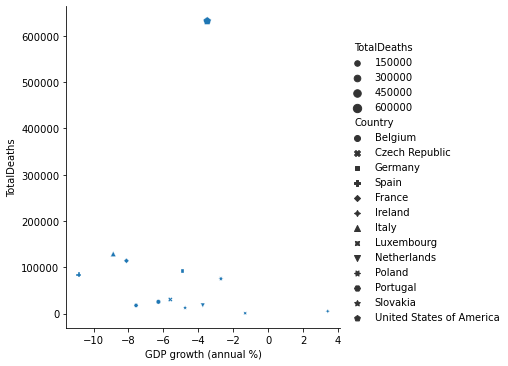

In [464]:
#looking for correlations between deaths and GDP deterioration
sns.relplot(x='GDP growth (annual %)',y='TotalDeaths', data=GDP_COVID19, style='Country', size='TotalDeaths');

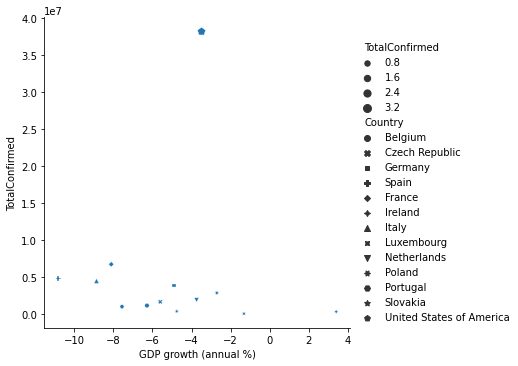

In [466]:
#looking for correlations between cases and GDP deterioration
sns.relplot(x='GDP growth (annual %)',y='TotalConfirmed', data=GDP_COVID19, style='Country', size='TotalConfirmed');